../campaign/precision7750/turbo.gpu.release-v1.2.6.csv: 3 failed experiments using turbo.gpu.release have been removed (the faulty experiments have been stored in failed_turbo.gpu.release-v1.2.6.csv).


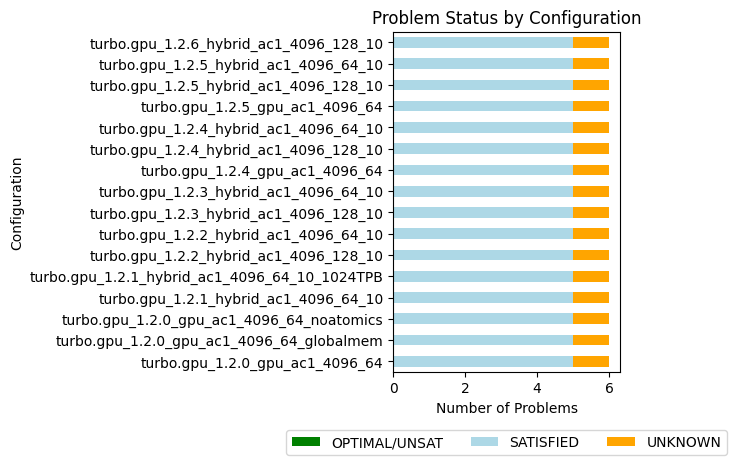

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
13,turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10,1.2.5,precision5820,turbo.gpu_1.2.5_hybrid_ac1_4096_128_10,63731.483896,56697.504797,0.0,0,2.271658e+06,1.050143e+06,0.0,0,31.536428,18.380490,0.0,6,0.201572,0.167836,0.0,6,89.312000,0.0,6,90.704,0,5,1,2,0,0.0
10,turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128_10,1.2.4,precision5820,turbo.gpu_1.2.4_hybrid_ac1_4096_128_10,42525.061499,16816.780653,0.0,0,1.871768e+06,3.477204e+05,0.0,0,31.533781,18.135414,0.0,6,0.201572,0.167836,0.0,6,89.312000,0.0,6,90.704,0,5,1,2,0,0.0
15,turbo.gpu.release_1.2.6_precision7750_300s_hybrid_ac1_4096_128_10,1.2.6,precision7750,turbo.gpu_1.2.6_hybrid_ac1_4096_128_10,36296.680990,16659.939568,0.0,0,2.217543e+06,3.231022e+05,0.0,0,40.332470,18.353057,0.0,6,0.201572,0.167836,0.0,6,89.312000,0.0,6,90.704,0,5,1,2,0,0.0
7,turbo.gpu.release_1.2.3_precision5820_300s_hybrid_ac1_4096_128_10,1.2.3,precision5820,turbo.gpu_1.2.3_hybrid_ac1_4096_128_10,35949.292718,26485.805981,0.0,0,2.484374e+05,1.014810e+05,0.0,0,9.663415,7.180472,0.0,6,1.746924,1.429572,0.0,6,7.109333,0.0,6,3.700,0,5,1,6,0,0.0
14,turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_64_10,1.2.5,precision5820,turbo.gpu_1.2.5_hybrid_ac1_4096_64_10,34227.768461,32396.136848,0.0,0,1.157660e+06,5.720144e+05,0.0,0,30.659801,17.881007,0.0,6,0.201572,0.167836,0.0,6,89.312000,0.0,6,90.704,0,5,1,2,0,0.0
12,turbo.gpu.release_1.2.5_precision5820_300s_gpu_ac1_4096_64,1.2.5,precision5820,turbo.gpu_1.2.5_gpu_ac1_4096_64,30021.135433,18159.095090,0.0,0,1.138654e+06,3.492006e+05,0.0,0,30.134306,17.928315,0.0,6,0.241886,0.201403,0.0,6,89.500000,0.0,6,90.892,0,5,1,0,2,0.0
9,turbo.gpu.release_1.2.4_precision5820_300s_gpu_ac1_4096_64,1.2.4,precision5820,turbo.gpu_1.2.4_gpu_ac1_4096_64,28801.808392,16529.834097,0.0,0,1.117323e+06,3.184593e+05,0.0,0,30.150912,18.026765,0.0,6,0.241886,0.201403,0.0,6,89.500000,0.0,6,90.892,0,5,1,0,2,0.0
5,turbo.gpu.release_1.2.2_precision5820_300s_hybrid_ac1_4096_128_10,1.2.2,precision5820,turbo.gpu_1.2.2_hybrid_ac1_4096_128_10,26444.525412,20580.700799,0.0,0,1.553997e+05,6.899862e+04,0.0,0,8.330600,7.176660,0.0,6,0.000000,0.000000,0.0,6,0.000000,0.0,6,0.000,0,5,1,6,0,0.0
11,turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_64_10,1.2.4,precision5820,turbo.gpu_1.2.4_hybrid_ac1_4096_64_10,25433.900723,16120.763826,0.0,0,9.889233e+05,3.164578e+05,0.0,0,30.653945,17.615247,0.0,6,0.201572,0.167836,0.0,6,89.312000,0.0,6,90.704,0,5,1,2,0,0.0
2,turbo.gpu.release_1.2.0_precision5820_300s_gpu_ac1_4096_64_noatomics,1.2.0,precision5820,turbo.gpu_1.2.0_gpu_ac1_4096_64_noatomics,21117.558579,16382.451895,0.0,0,1.311142e+05,6.360628e+04,0.0,0,8.628502,6.806481,0.0,6,2.099937,1.715486,0.0,6,7.309333,0.0,6,3.888,0,5,1,5,1,0.0


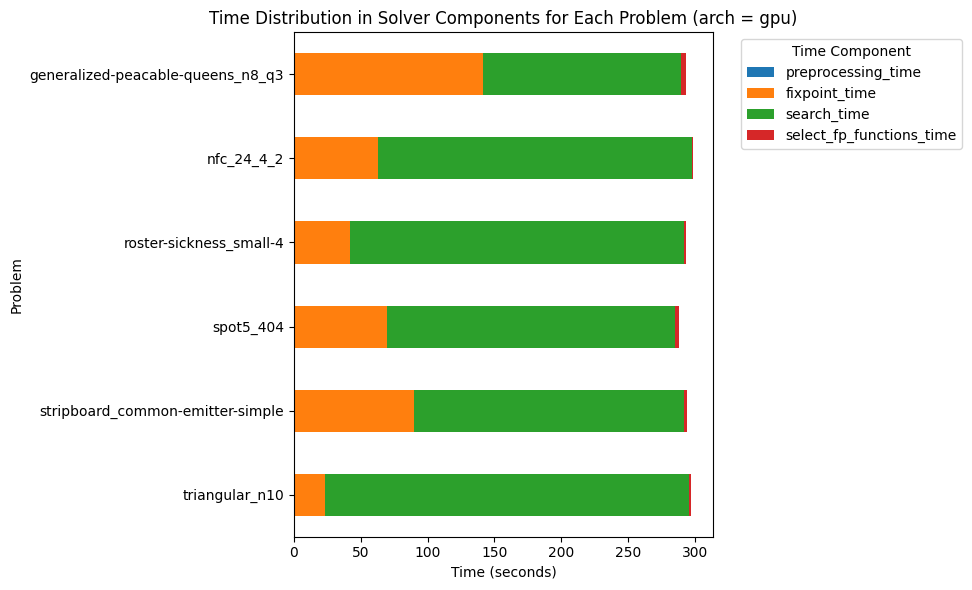

| Metrics | Normalized average [0,100] | Δ v1.2.4 | #best (_/6) | Average | Δ v1.2.4 | Median | Δ v1.2.4 |
|---------|----------------------------|----------|--------------|---------|----------|--------|----------|
| Nodes per second | 99.94 | +92% | 5 | 63731.48 | +50% | 56697.50 | +237% |
| Fixpoint iterations per second | 99.89 | +93% | 5 | 2271658.50 | +21% | 1050143.20 | +202% |
| Fixpoint iterations per node | 99.58 | 0% | 3 | 31.54 | 0% | 18.38 | +1% |
| Propagators memory | 100.00 | 0% | 0 | 0.20MB | 0% | 0.17MB | 0% |
| Variables store memory | 100.00 | 0% | 0 | 89.31KB | 0% | 90.70KB | 0% |

| Metrics | Count | Δ v1.2.4 |
|---------|-------|----------|
| #Problems at optimality | 0 | 0 | 
| #Problems satisfiable | 5 | 5  |
| #Problems unknown | 1 | 1  |
| #Problem with store in shared memory | 2 | 2  |
| #Problem with prop in shared memory | 0 | 0  |
| #Problems with IDLE SMs at timeout | 0.0 | 0.0 |


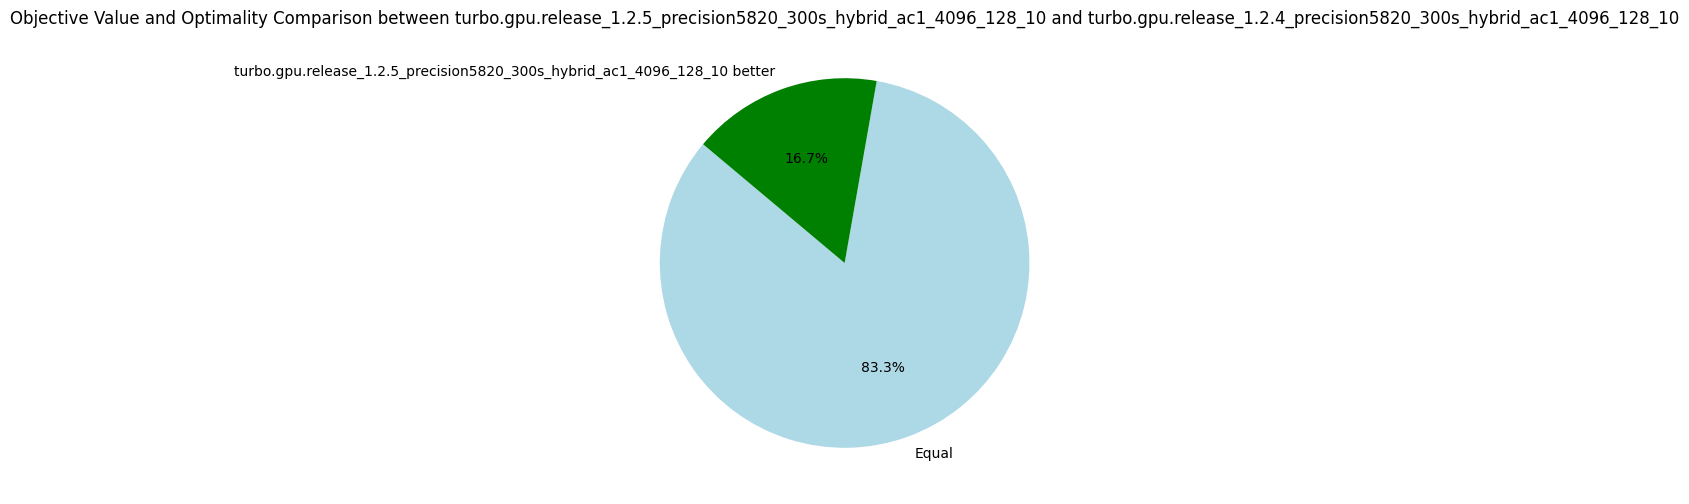

In [8]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv"
  # "../campaign/iris/turbo.gpu.release-v1.2.4.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])
# df.to_csv("test.csv", index=False)
# df = df[~(df['problem'] == "rcpsp")]
# df = df[df['problem'] == "rcpsp"]

# Because globalmem was only benchmarked on problems that could fit in shared memory.
# But we don't want to remove the others for most of the analysis. (comment the line if you want to analyse the globalmem results)
df = df[df['uid'] != "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64_globalmem"]

df = analysis.intersect(df)

# analysis.show_problem_table(df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128"])

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
# print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))

analysis.plot_time_distribution("gpu", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_gpu_ac1_4096_64"])
# analysis.plot_time_distribution("hybrid128", df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_4096_128_10"])
# analysis.plot_time_distribution("hybrid64", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_64_10"])
# analysis.plot_time_distribution("hybrid128", df[df['uid'] == "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_4096_128_10"])

analysis.comparison_table_md(df, "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128_10", "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10")

# print(analysis.list_problem_where_leq(df, "nodes", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_1024"))

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.2_precision5820_300s_4096_64_256")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.1.7_precision5820_300s_4096_64_256 better'])

p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10", "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128_10")
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10 better'])

# df[(df['uid'] == "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256") & (df['memory_configuration'] != "global") & (df['eps_num_subproblems'] == 4096)]
# df[(df['mzn_solver'] == "turbo.gpu.release") & (df['problem'] == "nfc") & (df['eps_num_subproblems'] == 4096)]